# LinkedIn Scraper

Citations
* [GitHub](https://github.com/christophe-garon/Linkedin-Post-Scraper/blob/main/linkedin-post-scraper.py)
* [Article](https://christophegaron.com/articles/mind/automation/scraping-linkedin-posts-with-selenium-and-beautiful-soup/)

Chrome Version 123.0.6312.107 (Official Build) (arm64) || ChromeDriver Stable Version: 123.0.6312.105 (r1262506)

In [89]:
# !pip install selenium
# !pip install webdriver-manager
# !pip install js2py

In [90]:
# Import necessary libraries
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.chrome.options import Options
from bs4 import BeautifulSoup as bs
import time
import pandas as pd
import re
from datetime import datetime
from dateutil.relativedelta import relativedelta
import seaborn as sns
from matplotlib import pyplot as plt

# Initialize Chrome options
chrome_options = Options()

# Set up date formatting for today's date
today = datetime.today().strftime('%Y-%m-%d')

In [91]:
#LinkedIn Credentials
username=""
password=""

#Url of the Linkedin Page you want to scrape
page = 'https://www.linkedin.com/company/suncast'

In [92]:
#access Webriver
browser = webdriver.Chrome()

#Open login page
browser.get('https://www.linkedin.com/login?fromSignIn=true&trk=guest_homepage-basic_nav-header-signin')

In [93]:
#Enter login info:
elementID = browser.find_element(By.ID, "username")
elementID.send_keys(username)

elementID = browser.find_element(By.ID, "password")
elementID.send_keys(password)

elementID.submit()

In [94]:
#Go to webpage
post_page = page + '/posts'
post_page = post_page.replace('//posts','/posts')
browser.get(post_page)

In [95]:
if page[-1] == "/":
    company_name = page.split("/")[-2]
else:
    company_name = page.split("/")[-1]

company_name = company_name.replace('-',' ').title()
print(company_name)

Suncast


In [96]:
import time

SCROLL_PAUSE_TIME = 1.5
MAX_SCROLLS = False

# JavaScript commands
SCROLL_COMMAND = "window.scrollTo(0, document.body.scrollHeight);"
GET_SCROLL_HEIGHT_COMMAND = "return document.body.scrollHeight"

# Initial scroll height
last_height = browser.execute_script(GET_SCROLL_HEIGHT_COMMAND)
scrolls = 0
no_change_count = 0

while True:
    # Scroll down to bottom
    browser.execute_script(SCROLL_COMMAND)

    # Wait to load page
    time.sleep(SCROLL_PAUSE_TIME)

    # Calculate new scroll height and compare with last scroll height
    new_height = browser.execute_script(GET_SCROLL_HEIGHT_COMMAND)

    # Increment no change count or reset it
    no_change_count = no_change_count + 1 if new_height == last_height else 0

    # Break loop if the scroll height has not changed for 3 cycles or reached the maximum scrolls
    if no_change_count >= 3 or (MAX_SCROLLS and scrolls >= MAX_SCROLLS):
        break

    last_height = new_height
    scrolls += 1

In [97]:
company_page = browser.page_source
linkedin_soup = bs(company_page.encode("utf-8"), "html")

with open(f"{company_name}_soup.txt", "w+") as t:
    t.write(linkedin_soup.prettify())
#print(linkedin_soup.prettify())

containers = linkedin_soup.find_all("div",{"class":"feed-shared-update-v2"})
containers = [container for container in containers if 'activity' in container.get('data-urn', '')]
print(len(containers))

containers_text = "\n\n".join([c.prettify() for c in containers])
with open(f"{company_name}_soup_containers.txt", "w+") as t:
    t.write(containers_text)

101


In [98]:
from datetime import datetime, timedelta

def convert_date(date_str):
    current_date = datetime.now()
    if date_str.endswith("h"):
        hours = int(date_str[:-1])
        new_date = current_date - timedelta(hours=hours)
    elif date_str.endswith("d"):
        days = int(date_str[:-1])
        new_date = current_date - timedelta(days=days)
    elif date_str.endswith("w"):
        weeks = int(date_str[:-1])
        new_date = current_date - timedelta(weeks=weeks)
    elif date_str.endswith("m"):
        months = int(date_str[:-2])
        new_date = current_date - timedelta(days=months*30)
    elif date_str.endswith("mo"):
        months = int(date_str[:-2])
        new_date = current_date - timedelta(days=months*30)
    elif date_str.endswith("yr"):
        years = int(date_str[:-2])
        new_date = current_date - timedelta(weeks=years*52)
    else:
        return None
    
    return new_date.strftime("%Y-%m-%d")

In [99]:
import re

# Define a data structure to hold all the post information
posts_data = []

def get_text(container, selector, attributes):
    try:
        element = container.find(selector, attributes)
        if element:
            return element.text.strip()
    except Exception as e:
        print(e)
    return ""

# Function to extract media information
def get_media_info(container):
    media_info = [("div", {"class": "update-components-video"}, "Video"),
                  ("div", {"class": "update-components-linkedin-video"}, "Video"),
                  ("div", {"class": "update-components-image"}, "Image"),
                  ("article", {"class": "update-components-article"}, "Article"),
                  ("div", {"class": "feed-shared-external-video__meta"}, "Youtube Video"),
                  ("div", {"class": "feed-shared-mini-update-v2 feed-shared-update-v2__update-content-wrapper artdeco-card"}, "Shared Post"),
                  ("div", {"class": "feed-shared-poll ember-view"}, "Other: Poll, Shared Post, etc")]

    for selector, attrs, media_type in media_info:
        element = container.find(selector, attrs)
        if element:
            link = element.find('a', href=True)
            return link['href'] if link else "None", media_type
    return "None", "Unknown"


# Main loop to process each container
import re

# Define a data structure to hold all the post information
posts_data = []

def get_text(container, selector, attributes):
    try:
        element = container.find(selector, attributes)
        if element:
            return element.text.strip()
    except Exception as e:
        print(e)
    return ""

# Function to extract media information
def get_media_info(container):
    media_info = [("div", {"class": "update-components-video"}, "Video"),
                  ("div", {"class": "update-components-linkedin-video"}, "Video"),
                  ("div", {"class": "update-components-image"}, "Image"),
                  ("article", {"class": "update-components-article"}, "Article"),
                  ("div", {"class": "feed-shared-external-video__meta"}, "Youtube Video"),
                  ("div", {"class": "feed-shared-mini-update-v2 feed-shared-update-v2__update-content-wrapper artdeco-card"}, "Shared Post"),
                  ("div", {"class": "feed-shared-poll ember-view"}, "Other: Poll, Shared Post, etc")]
    
    for selector, attrs, media_type in media_info:
        element = container.find(selector, attrs)
        if element:
            link = element.find('a', href=True)
            return link['href'] if link else "None", media_type
    return "None", "Unknown"


# Main loop to process each container
for container in containers:
    post_text = get_text(container, "div", {"class": "feed-shared-update-v2__description-wrapper"})
    media_link, media_type = get_media_info(container)  # Update this line
    post_date = get_text(container, "span", {"class": "update-components-actor__sub-description t-12 t-normal t-black--light"})[:3].strip()
    post_date = convert_date(post_date)
    
    # Likes (reactions)
    likes_element = container.find_all(lambda tag: tag.name == 'span' and 'aria-hidden' in tag.attrs and 'social-details-social-counts__reactions-count' in tag.attrs.get('class', []))
    post_likes = likes_element[0].text.strip() if likes_element else "0"
    
    # Convert post_likes to integer
    post_likes = int(post_likes) if post_likes.isdigit() else 0

    # Comments
    comment_element = container.find_all(lambda tag: tag.name == 'button' and 'aria-label' in tag.attrs and 'comments' in tag['aria-label'].lower())
    comment_idx = 1 if len(comment_element) > 1 else 0
    post_comments = comment_element[comment_idx]['aria-label'].strip() if comment_element else 0

    # Extracting the number of comments from the aria-label
    comments_numeric = re.findall(r'\d+', str(post_comments))
    if comments_numeric:
        post_comments = int(comments_numeric[0])
    else:
        post_comments = 0

    # Shares
    shares_element = container.find_all(lambda tag: tag.name == 'button' and 'aria-label' in tag.attrs and 'repost' in tag['aria-label'].lower())
    shares_idx = 1 if len(shares_element) > 1 else 0
    post_shares = shares_element[shares_idx].text.strip() if shares_element and shares_element[shares_idx].text.strip() != '' else 0

    # Just extract the number for shares
    shares_numeric = re.findall(r'\d+', str(post_shares))
    if shares_numeric:
        post_shares = int(shares_numeric[0])
    else:
        post_shares = 0
        
    # Append the collected data to the posts_data list
    posts_data.append({
        "Page": company_name,
        "Date": post_date,
        "Post Text": post_text,
        "Media Type": media_type,
        "Likes": post_likes,
        "Comments": post_comments,
        "Shares": post_shares,
        # "Media Link": media_link
    })

In [189]:
try:
    df = pd.DataFrame(posts_data)
except:
    for item in list(data.keys()):
        print(item)
        print(len(data[item]))
        
for col in df.columns:
    try:
        df[col] = df[col].astype(int)
    except:
        pass
    
df.sort_values(by="Likes", inplace=True, ascending=False)

df.loc[df['Media Type'] == 'Unknown', 'Media Type'] = 'Link'

df

,Page,Date,Post Text,Media Type,Likes,Comments,Shares
82,Suncast,2023-08-29,"In the vast expanse of renewable energy, under...",Image,97,5,4
92,Suncast,2024-03-26,"""You cannot even imagine all the stuff I know ...",Image,80,5,3
34,Suncast,2024-03-26,The solar industry has always been deeply dedi...,Image,80,4,7
85,Suncast,2023-07-30,"In the world of renewables, resilience is more...",Image,76,6,5
27,Suncast,2024-01-26,Do any of these solar development problems sou...,Video,74,4,11
...,...,...,...,...,...,...,...
81,Suncast,2023-08-29,"""What do you want to do? What do you like? Wha...",Image,3,0,0
52,Suncast,2024-03-26,"If you're in residential solar, you won't want...",Image,3,0,0
26,Suncast,2023-12-27,Day 2 of the 12 Days of Christmas brings you.....,Image,1,0,1
46,Suncast,2024-02-25,Reminder to join us at 12 pm CDT today for ano...,Link,1,0,1


In [101]:
df.to_csv("{}_posts.csv".format(company_name), encoding='utf-8', index=False)

## Keyword Analysis

In [103]:
from collections import defaultdict
import re
from nltk.corpus import stopwords
import nltk
# nltk.download('stopwords')

def extract_keywords(post):
    post = re.sub(r'[^\w\s]', '', post) # remove punctuation
    words = post.lower().split()

    stop_words = set(stopwords.words('english')) # words like 'the', 'a', etc.
    keywords = [word for word in words if word not in stop_words and not any(char.isdigit() for char in word)]

    return keywords

In [104]:
# Initialize keyword metrics dictionary
keyword_metrics = defaultdict(lambda: {'likes': 0, 'comments': 0, 'shares': 0, 'num_posts': 0})

# Iterate over each row in the DataFrame
for index, row in df.iterrows():
    likes = row['Likes']
    comments = row['Comments']
    shares = row['Shares']
    media_type = row['Media Type']

    # Extract keywords from the post text
    keywords = extract_keywords(row['Post Text'])

    # Update keyword metrics for each keyword in the post
    for keyword in keywords:
        keyword_metrics[keyword]['likes'] += likes
        keyword_metrics[keyword]['comments'] += comments
        keyword_metrics[keyword]['shares'] += shares
        keyword_metrics[keyword]['num_posts'] += 1

# Convert keyword metrics dictionary to DataFrame
keywords = pd.DataFrame.from_dict(keyword_metrics, orient='index')

# Calculate average metrics per keyword
keywords['avg_likes'] = keywords['likes'] / keywords['num_posts']
keywords['avg_comments'] = keywords['comments'] / keywords['num_posts']
keywords['avg_shares'] = keywords['shares'] / keywords['num_posts']

# Sort keywords by average metrics
keywords_avg = keywords.sort_values(by=['avg_likes', 'avg_comments', 'avg_shares'], ascending=False)

# Sort keywords by total metrics
keywords_sum = keywords.sort_values(by=['likes', 'comments', 'shares'], ascending=False)

# Display the resulting DataFrames
keywords_avg
keywords_sum

# Save DataFrame to CSV file
# keywords_avg.to_csv('avg.csv')
# keywords_sum.to_csv('sum.csv')

,likes,comments,shares,num_posts,avg_likes,avg_comments,avg_shares
solar,3539,277,440,167,21.191617,1.658683,2.634731
energy,3129,287,336,174,17.982759,1.649425,1.931034
see,2114,178,242,119,17.764706,1.495798,2.033613
episode,1552,124,145,74,20.972973,1.675676,1.959459
us,1061,56,128,71,14.943662,0.788732,1.802817
...,...,...,...,...,...,...,...
recognizespencer,0,0,2,1,0.000000,0.000000,2.000000
bodhijoin,0,0,2,1,0.000000,0.000000,2.000000
february,0,0,2,1,0.000000,0.000000,2.000000
beforehandsee,0,0,2,1,0.000000,0.000000,2.000000


#### Average/Cumulative Likes

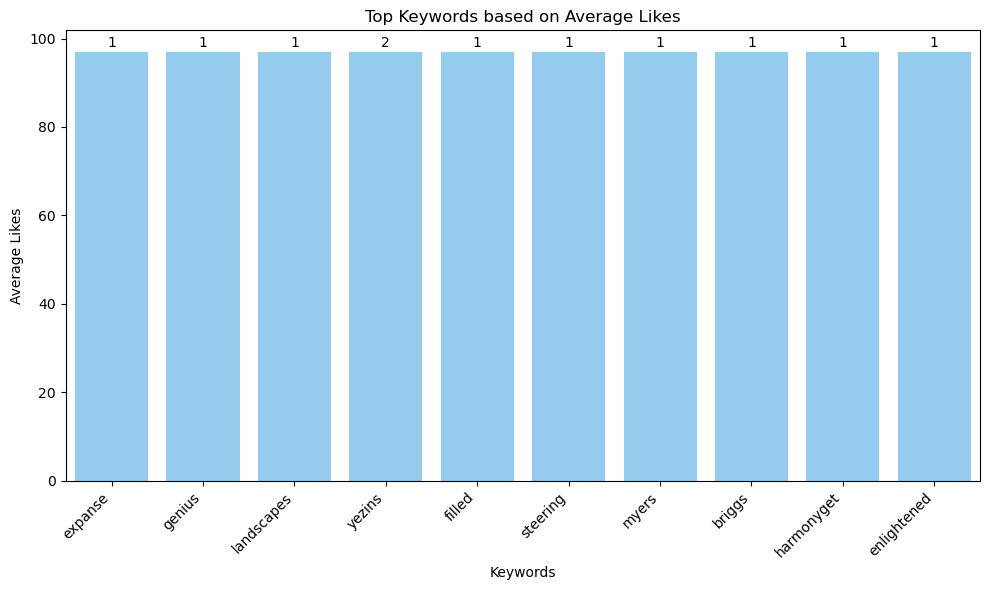

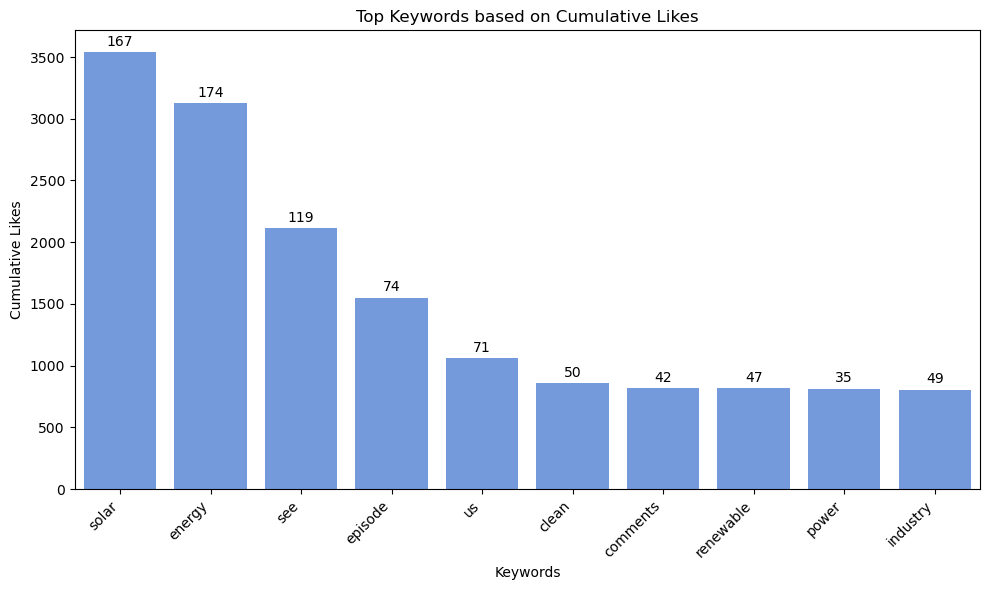

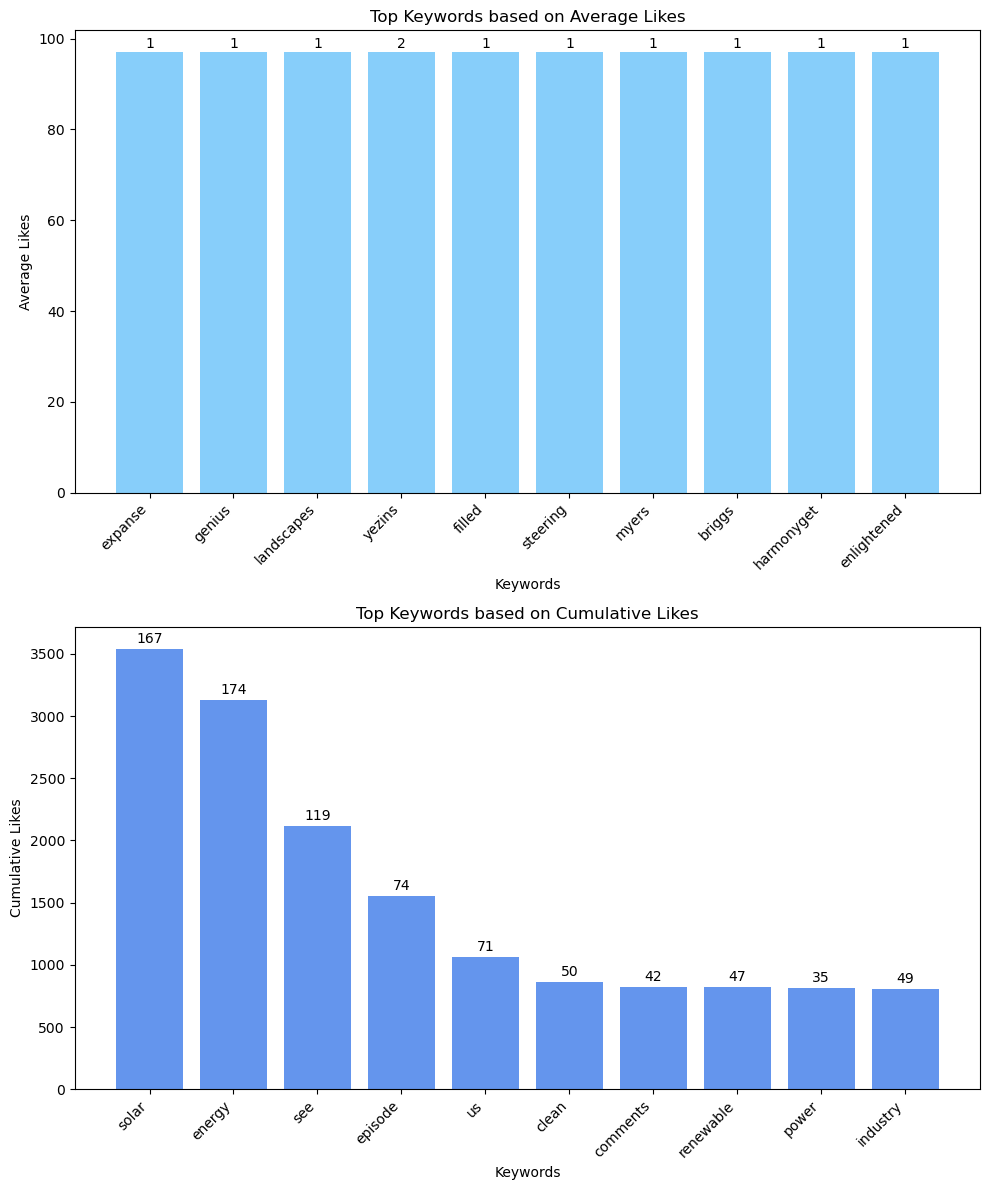

In [106]:
# Create the first plot for Average Likes
plt.figure(figsize=(10, 6))
sns.barplot(x=keywords_avg.head(10).index, y=keywords_avg.head(10)['avg_likes'], color='lightskyblue')
plt.title('Top Keywords based on Average Likes')
plt.xlabel('Keywords')
plt.ylabel('Average Likes')
plt.xticks(rotation=45, ha='right')
for i, value in enumerate(keywords_avg.head(10)['num_posts']):
    plt.text(i, keywords_avg.head(10)['avg_likes'].iloc[i] + 0.5, str(value), color='black', ha='center', va='bottom')
plt.tight_layout()
# plt.savefig('avg_likes.png')
average_likes_plot = plt.gca()  # Store the first plot

# Create the second plot for Cumulative Likes
plt.figure(figsize=(10, 6))
sns.barplot(x=keywords_sum.head(10).index, y=keywords_sum.head(10)['likes'], color='cornflowerblue')
plt.title('Top Keywords based on Cumulative Likes')
plt.xlabel('Keywords')
plt.ylabel('Cumulative Likes')
plt.xticks(rotation=45, ha='right')
for i, value in enumerate(keywords_sum.head(10)['num_posts']):
    plt.text(i, keywords_sum.head(10)['likes'].iloc[i] + 50, value, color='black', ha='center')
plt.tight_layout()
# plt.savefig('sum_likes.png')
cumulative_likes_plot = plt.gca()  # Store the second plot

# Display the plots vertically
fig, axes = plt.subplots(2, 1, figsize=(10, 12))

# Add the first plot to the first subplot
plt.sca(axes[0])
plt.title('Top Keywords based on Average Likes')
plt.xlabel('Keywords')
plt.ylabel('Average Likes')
plt.xticks(rotation=45, ha='right')
plt.bar(keywords_avg.head(10).index, keywords_avg.head(10)['avg_likes'], color='lightskyblue')
for i, value in enumerate(keywords_avg.head(10)['num_posts']):
    plt.text(i, keywords_avg.head(10)['avg_likes'].iloc[i] + 1, value, color='black', ha='center')

# Add the second plot to the second subplot
plt.sca(axes[1])
plt.title('Top Keywords based on Cumulative Likes')
plt.xlabel('Keywords')
plt.ylabel('Cumulative Likes')
plt.xticks(rotation=45, ha='right')
plt.bar(keywords_sum.head(10).index, keywords_sum.head(10)['likes'], color='cornflowerblue')
for i, value in enumerate(keywords_sum.head(10)['num_posts']):
    plt.text(i, keywords_sum.head(10)['likes'].iloc[i] + 50, value, color='black', ha='center')

plt.tight_layout()

# Save the figure
# plt.savefig('likes_combined.png')

plt.show()

#### Average/Cumulative Comments

/var/folders/cm/7wtf9cln3ts731ls6twy_gsh0000gn/T/ipykernel_92968/383187575.py:16: UserWarning: Glyph 119826 (\N{MATHEMATICAL BOLD CAPITAL S}) missing from current font.
  plt.tight_layout()
/var/folders/cm/7wtf9cln3ts731ls6twy_gsh0000gn/T/ipykernel_92968/383187575.py:16: UserWarning: Glyph 119853 (\N{MATHEMATICAL BOLD SMALL T}) missing from current font.
  plt.tight_layout()
/var/folders/cm/7wtf9cln3ts731ls6twy_gsh0000gn/T/ipykernel_92968/383187575.py:16: UserWarning: Glyph 119851 (\N{MATHEMATICAL BOLD SMALL R}) missing from current font.
  plt.tight_layout()
/var/folders/cm/7wtf9cln3ts731ls6twy_gsh0000gn/T/ipykernel_92968/383187575.py:16: UserWarning: Glyph 119834 (\N{MATHEMATICAL BOLD SMALL A}) missing from current font.
  plt.tight_layout()
/var/folders/cm/7wtf9cln3ts731ls6twy_gsh0000gn/T/ipykernel_92968/383187575.py:16: UserWarning: Glyph 119838 (\N{MATHEMATICAL BOLD SMALL E}) missing from current font.
  plt.tight_layout()
/var/folders/cm/7wtf9cln3ts731ls6twy_gsh0000gn/T/ipykernel

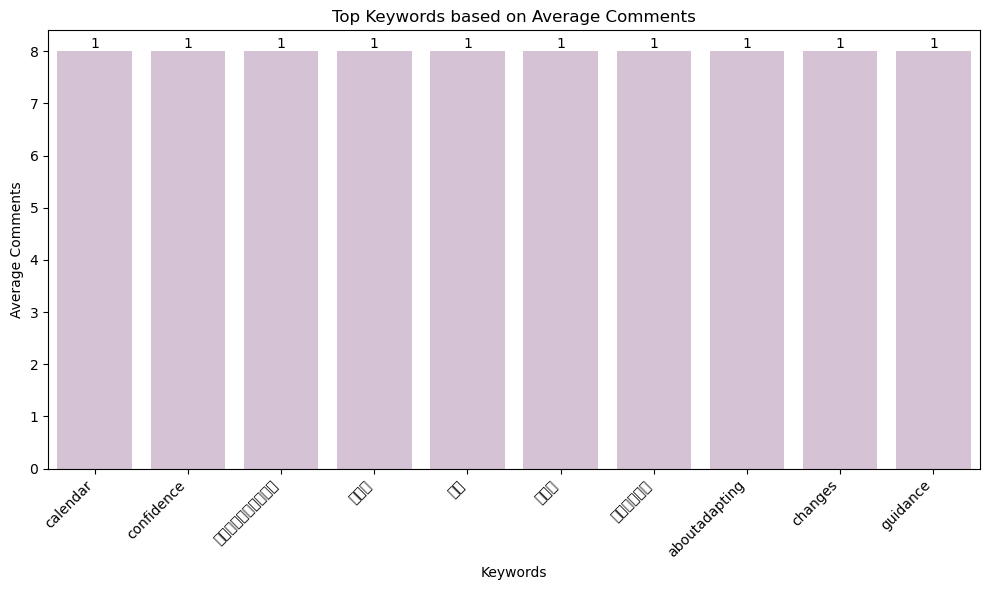

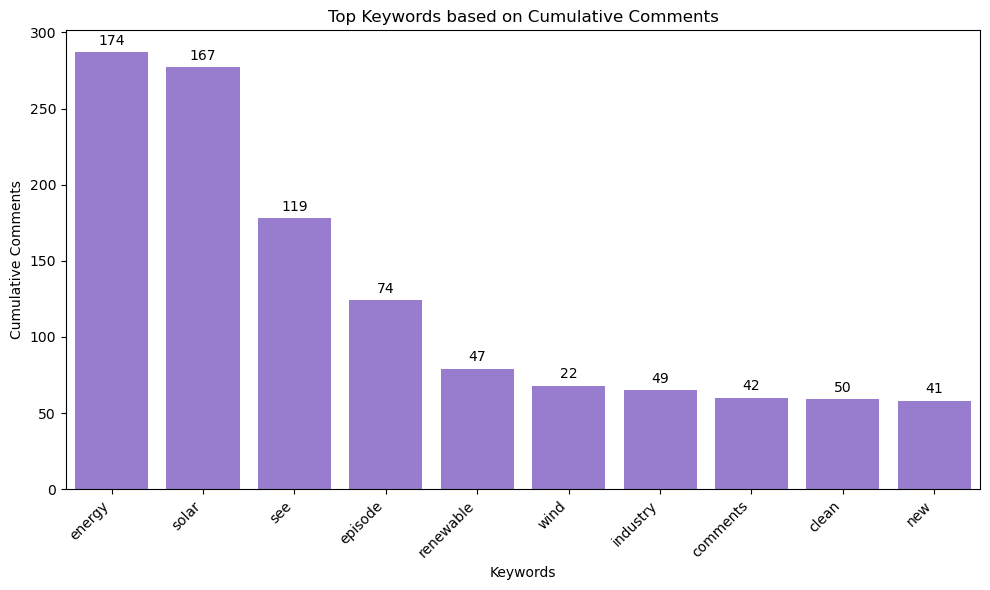

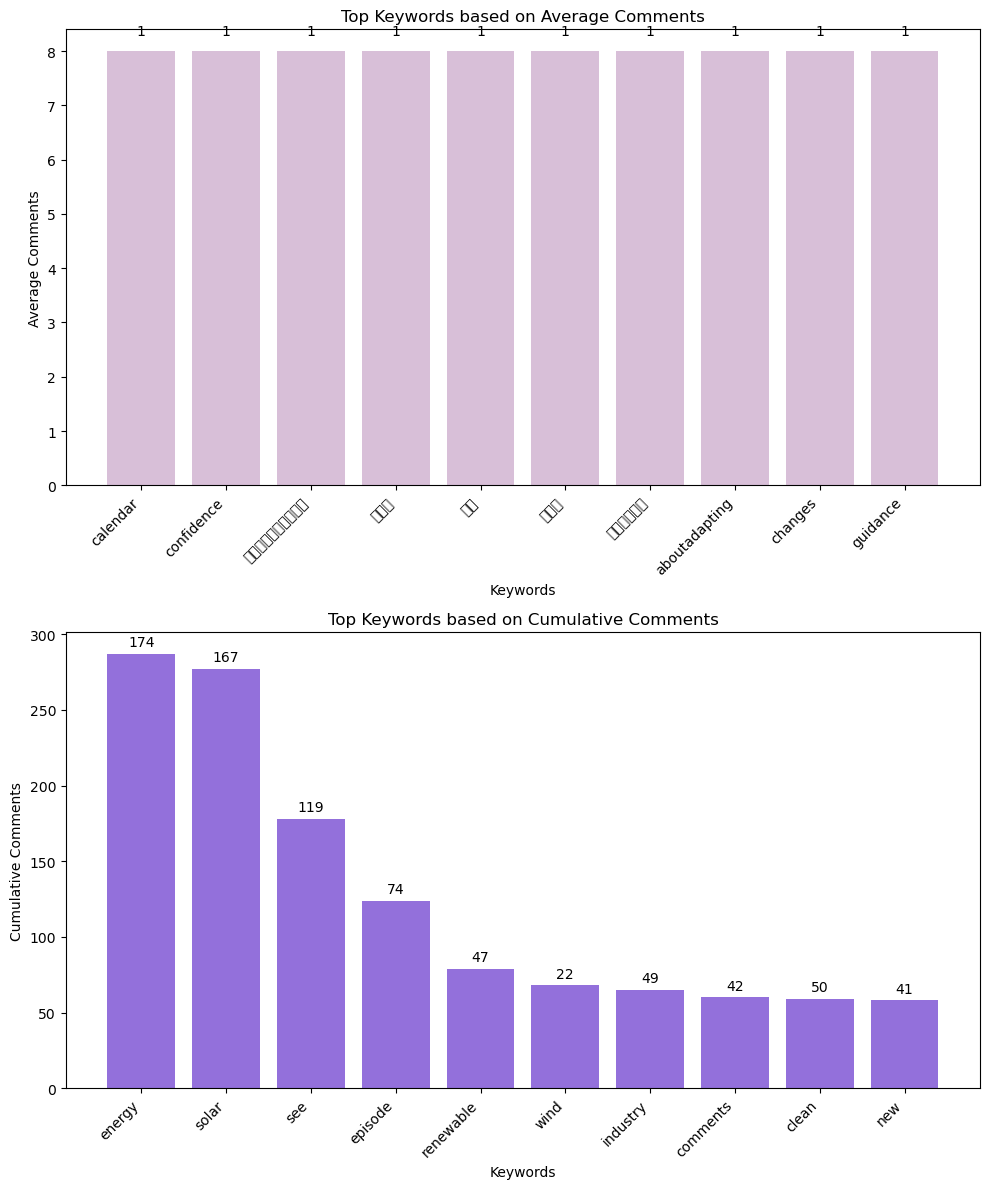

In [108]:
# Sort the keywords_avg DataFrame based on average comments in descending order
keywords_avg_sorted = keywords_avg.sort_values(by='avg_comments', ascending=False)

# Sort the keywords_sum DataFrame based on cumulative comments in descending order
keywords_sum_sorted = keywords_sum.sort_values(by='comments', ascending=False)

# Create the first plot for Average Comments
plt.figure(figsize=(10, 6))
sns.barplot(x=keywords_avg_sorted.head(10).index, y=keywords_avg_sorted.head(10)['avg_comments'], color='thistle')
plt.title('Top Keywords based on Average Comments')
plt.xlabel('Keywords')
plt.ylabel('Average Comments')
plt.xticks(rotation=45, ha='right')
for i, value in enumerate(keywords_avg_sorted.head(10)['num_posts']):
    plt.text(i, keywords_avg_sorted.head(10)['avg_comments'].iloc[i] + 0.01, str(value), color='black', ha='center', va='bottom')
plt.tight_layout()
average_comments_plot = plt.gca()  # Store the first plot

# Save the first plot
# plt.savefig('avg_comments.png')

# Create the second plot for Cumulative Comments
plt.figure(figsize=(10, 6))
sns.barplot(x=keywords_sum_sorted.head(10).index, y=keywords_sum_sorted.head(10)['comments'], color='mediumpurple')
plt.title('Top Keywords based on Cumulative Comments')
plt.xlabel('Keywords')
plt.ylabel('Cumulative Comments')
plt.xticks(rotation=45, ha='right')
for i, value in enumerate(keywords_sum_sorted.head(10)['num_posts']):
    plt.text(i, keywords_sum_sorted.head(10)['comments'].iloc[i] + 5, value, color='black', ha='center')
plt.tight_layout()
cumulative_comments_plot = plt.gca()  # Store the second plot

# Save the second plot
# plt.savefig('sum_comments.png')

# Display the plots vertically
fig, axes = plt.subplots(2, 1, figsize=(10, 12))

# Add the first plot to the first subplot
plt.sca(axes[0])
plt.title('Top Keywords based on Average Comments')
plt.xlabel('Keywords')
plt.ylabel('Average Comments')
plt.xticks(rotation=45, ha='right')
plt.bar(keywords_avg_sorted.head(10).index, keywords_avg_sorted.head(10)['avg_comments'], color='thistle')
for i, value in enumerate(keywords_avg_sorted.head(10)['num_posts']):
    plt.text(i, keywords_avg_sorted.head(10)['avg_comments'].iloc[i] + 0.3, value, color='black', ha='center')

# Add the second plot to the second subplot
plt.sca(axes[1])
plt.title('Top Keywords based on Cumulative Comments')
plt.xlabel('Keywords')
plt.ylabel('Cumulative Comments')
plt.xticks(rotation=45, ha='right')
plt.bar(keywords_sum_sorted.head(10).index, keywords_sum_sorted.head(10)['comments'], color='mediumpurple')
for i, value in enumerate(keywords_sum_sorted.head(10)['num_posts']):
    plt.text(i, keywords_sum_sorted.head(10)['comments'].iloc[i] + 5, value, color='black', ha='center')

plt.tight_layout()

# Save the figure
# plt.savefig('comments_combined.png')

plt.show()

#### Average/Cumulative Shares

/var/folders/cm/7wtf9cln3ts731ls6twy_gsh0000gn/T/ipykernel_92968/1029527913.py:16: UserWarning: Glyph 120387 (\N{MATHEMATICAL SANS-SERIF BOLD ITALIC CAPITAL H}) missing from current font.
  plt.tight_layout()
/var/folders/cm/7wtf9cln3ts731ls6twy_gsh0000gn/T/ipykernel_92968/1029527913.py:16: UserWarning: Glyph 120384 (\N{MATHEMATICAL SANS-SERIF BOLD ITALIC CAPITAL E}) missing from current font.
  plt.tight_layout()
/var/folders/cm/7wtf9cln3ts731ls6twy_gsh0000gn/T/ipykernel_92968/1029527913.py:16: UserWarning: Glyph 120391 (\N{MATHEMATICAL SANS-SERIF BOLD ITALIC CAPITAL L}) missing from current font.
  plt.tight_layout()
/var/folders/cm/7wtf9cln3ts731ls6twy_gsh0000gn/T/ipykernel_92968/1029527913.py:16: UserWarning: Glyph 120395 (\N{MATHEMATICAL SANS-SERIF BOLD ITALIC CAPITAL P}) missing from current font.
  plt.tight_layout()
/var/folders/cm/7wtf9cln3ts731ls6twy_gsh0000gn/T/ipykernel_92968/1029527913.py:16: UserWarning: Glyph 120392 (\N{MATHEMATICAL SANS-SERIF BOLD ITALIC CAPITAL M}) mis

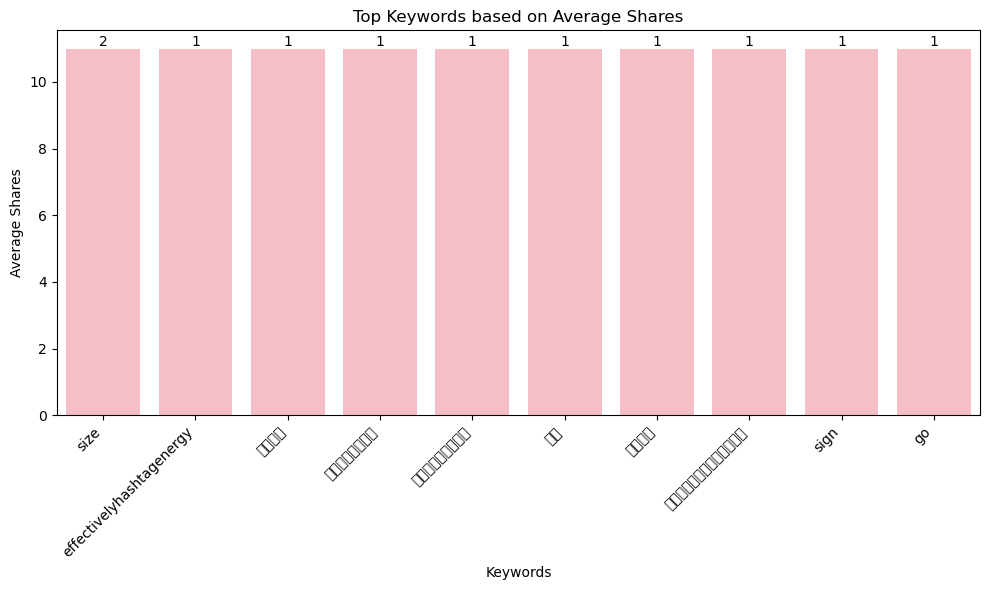

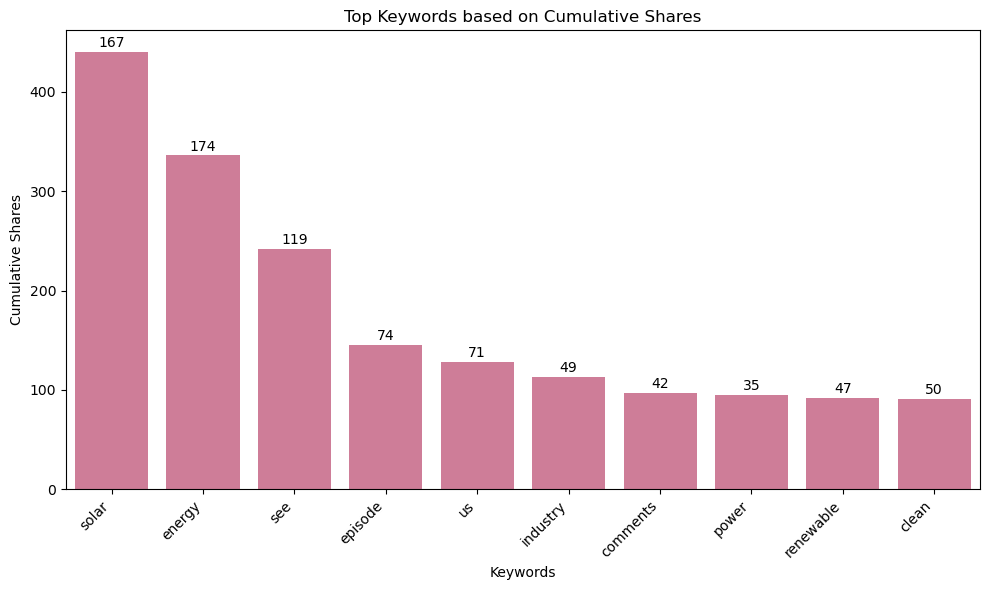

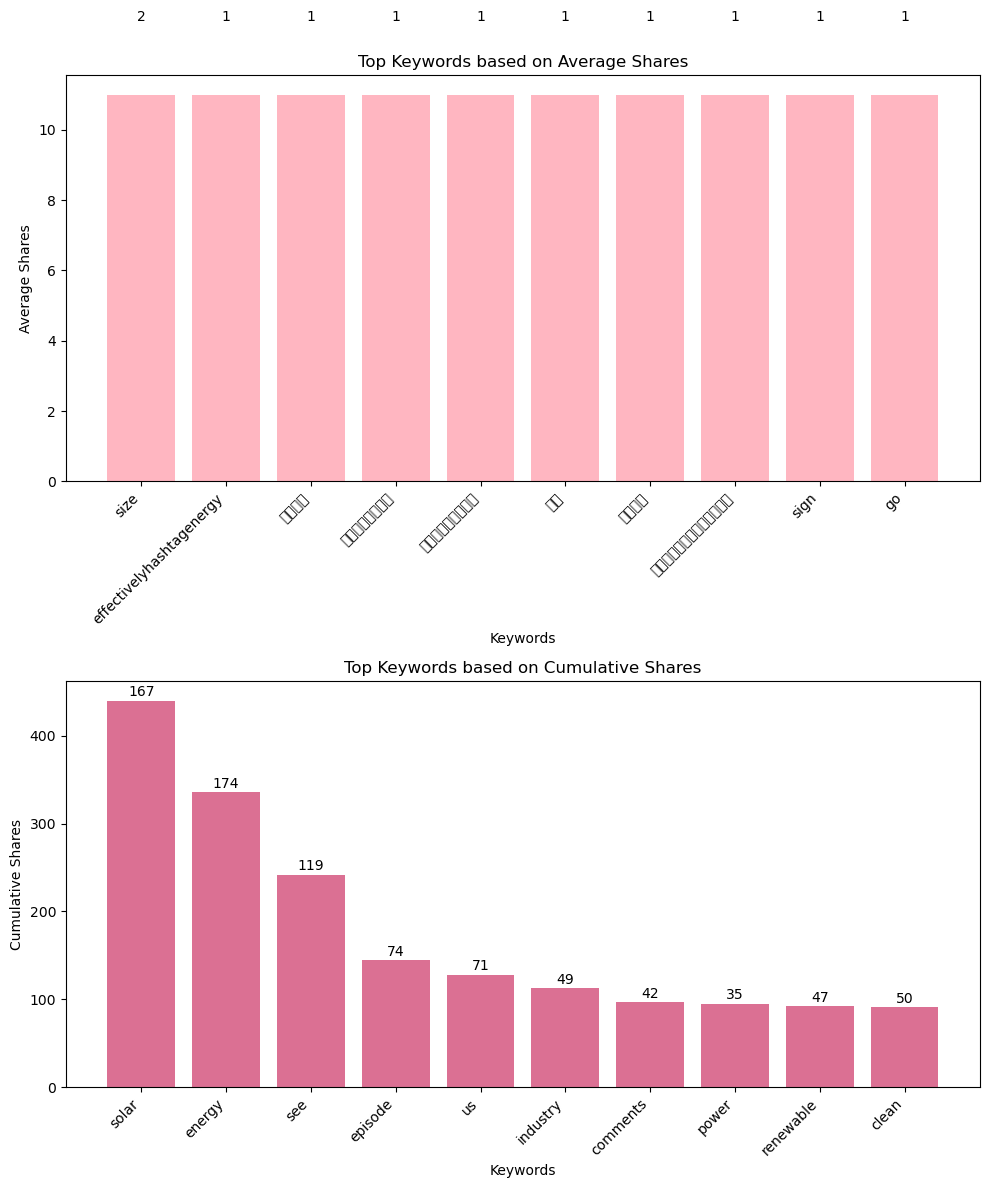

In [110]:
# Sort the keywords_avg DataFrame based on average shares in descending order
keywords_avg_sorted = keywords_avg.sort_values(by='avg_shares', ascending=False)

# Sort the keywords_sum DataFrame based on cumulative shares in descending order
keywords_sum_sorted_shares = keywords_sum.sort_values(by='shares', ascending=False)

# Create the first plot for Average Shares
plt.figure(figsize=(10, 6))
sns.barplot(x=keywords_avg_sorted.head(10).index, y=keywords_avg_sorted.head(10)['avg_shares'], color='lightpink')
plt.title('Top Keywords based on Average Shares')
plt.xlabel('Keywords')
plt.ylabel('Average Shares')
plt.xticks(rotation=45, ha='right')
for i, value in enumerate(keywords_avg_sorted.head(10)['num_posts']):
    plt.text(i, keywords_avg_sorted.head(10)['avg_shares'].iloc[i] + 0.001, str(value), color='black', ha='center', va='bottom')
plt.tight_layout()
average_shares_plot = plt.gca()  # Store the first plot

# Save the first plot
# plt.savefig('avg_shares.png')

# Create the second plot for Cumulative Shares
plt.figure(figsize=(10, 6))
sns.barplot(x=keywords_sum_sorted_shares.head(10).index, y=keywords_sum_sorted_shares.head(10)['shares'], color='palevioletred')
plt.title('Top Keywords based on Cumulative Shares')
plt.xlabel('Keywords')
plt.ylabel('Cumulative Shares')
plt.xticks(rotation=45, ha='right')
for i, value in enumerate(keywords_sum_sorted_shares.head(10)['num_posts']):
    plt.text(i, keywords_sum_sorted_shares.head(10)['shares'].iloc[i] + 5, str(value), color='black', ha='center')
plt.tight_layout()
cumulative_shares_plot = plt.gca()  # Store the second plot

# Save the second plot
# plt.savefig('sum_shares.png')

# Display the plots vertically
fig, axes = plt.subplots(2, 1, figsize=(10, 12))

# Add the first plot to the first subplot
plt.sca(axes[0])
plt.title('Top Keywords based on Average Shares')
plt.xlabel('Keywords')
plt.ylabel('Average Shares')
plt.xticks(rotation=45, ha='right')
plt.bar(keywords_avg_sorted.head(10).index, keywords_avg_sorted.head(10)['avg_shares'], color='lightpink')
for i, value in enumerate(keywords_avg_sorted.head(10)['num_posts']):
    plt.text(i, keywords_avg.head(10)['avg_shares'].iloc[i] + 9.1, str(value), color='black', ha='center')

# Add the second plot to the second subplot
plt.sca(axes[1])
plt.title('Top Keywords based on Cumulative Shares')
plt.xlabel('Keywords')
plt.ylabel('Cumulative Shares')
plt.xticks(rotation=45, ha='right')
plt.bar(keywords_sum_sorted_shares.head(10).index, keywords_sum_sorted_shares.head(10)['shares'], color='palevioletred')
for i, value in enumerate(keywords_sum_sorted_shares.head(10)['num_posts']):
    plt.text(i, keywords_sum_sorted_shares.head(10)['shares'].iloc[i] + 5, str(value), color='black', ha='center')

plt.tight_layout()

# Save the figure
# plt.savefig('shares_combined.png')

plt.show()

#### Media Type Analysis

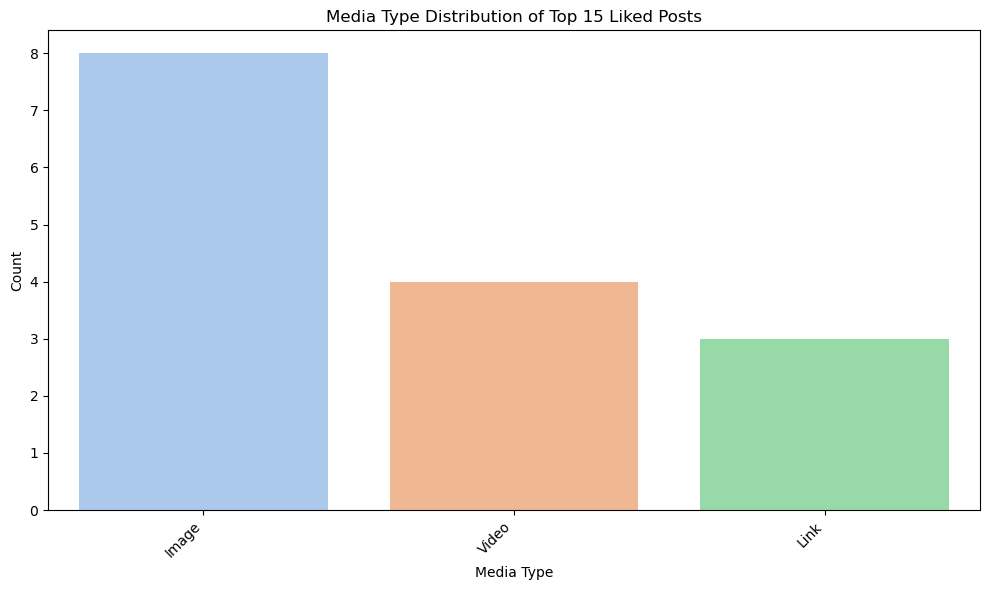

In [191]:
# BY LIKES

# Sort the DataFrame by 'Likes' in descending order
top_liked_posts = df.sort_values(by='Likes', ascending=False)

# Get the top N posts
N = 15  # You can change this value to visualize more or fewer posts
top_N_liked_posts = top_liked_posts.head(N)

# Count the occurrences of each media type in the top N liked posts
media_type_counts = top_N_liked_posts['Media Type'].value_counts()

# Plot the distribution of media types
plt.figure(figsize=(10, 6))
sns.barplot(x=media_type_counts.index, y=media_type_counts.values, palette='pastel')
plt.title(f'Media Type Distribution of Top {N} Liked Posts')
plt.xlabel('Media Type')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Save the plot
plt.savefig('media_likes.png')

plt.show()

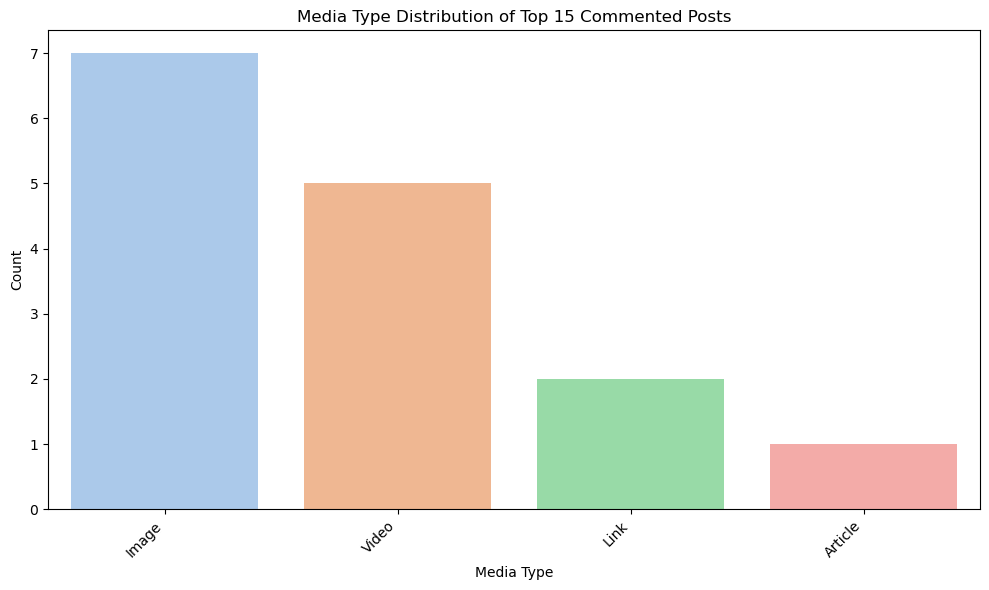

In [193]:
# BY COMMENTS

# Sort the DataFrame by 'Comments' in descending order
top_commented_posts = df.sort_values(by='Comments', ascending=False)

# Get the top N posts
N = 15  # You can change this value to visualize more or fewer posts
top_N_commented_posts = top_commented_posts.head(N)

# Count the occurrences of each media type in the top N commented posts
media_type_counts = top_N_commented_posts['Media Type'].value_counts()

# Plot the distribution of media types
plt.figure(figsize=(10, 6))
sns.barplot(x=media_type_counts.index, y=media_type_counts.values, palette='pastel')
plt.title(f'Media Type Distribution of Top {N} Commented Posts')
plt.xlabel('Media Type')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Save the plot
plt.savefig('media_comments.png')

plt.show()

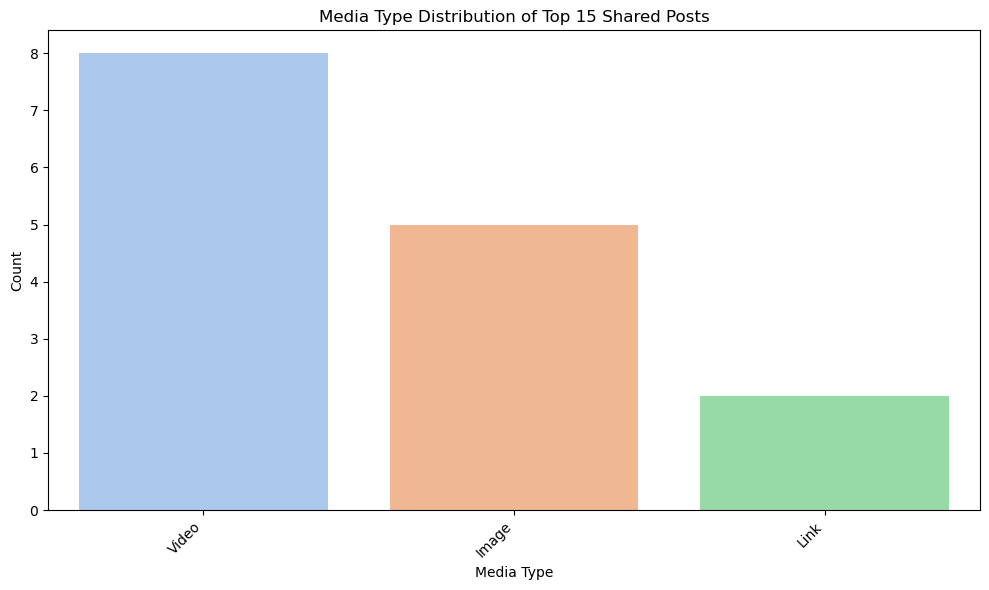

In [213]:
# BY SHARES

# Sort the DataFrame by 'Shares' in descending order
top_shared_posts = df.sort_values(by='Shares', ascending=False)

# Get the top N posts
N = 15  # You can change this value to visualize more or fewer posts
top_N_shared_posts = top_shared_posts.head(N)

# Count the occurrences of each media type in the top N shared posts
media_type_counts = top_N_shared_posts['Media Type'].value_counts()

import numpy as np

# Plot the distribution of media types
plt.figure(figsize=(10, 6))
sns.barplot(x=media_type_counts.index, y=media_type_counts.values, palette='pastel')
plt.title(f'Media Type Distribution of Top {N} Shared Posts')
plt.xlabel('Media Type')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.yticks(np.arange(0, max(media_type_counts.values)+1, 1))
plt.tight_layout()

# Save the plot
plt.savefig('media_shares.png')

plt.show()

### NOTE: The code cells below reflect a previous approach that would only be possible with the exact LinkedIn post date (which is not available from scraping).
#### It is maintained as a documentation of code.

Limitations (if had exact date):
* Only able to export LinkedIn data from within last year, imported data from 04/08/2023 - 04/06/2024
* Scraper is only scraping ~97 posts (numbers vary every time), as opposed to all posts, but they should be the most recent posts
* Scraper only scrapes text up until "see more". This might be fine since the idea is we want to capture people's attention in the first sentence or so anyways

In [117]:
# # Join scraped data with LinkedIn Analytics data on date

# # Modify LinkedIn Analytics df before join
# linkedin_analytics = pd.read_csv('LinkedIn/linkedin_analytics_data.csv', header = 1)
# linkedin_analytics['Date'] = pd.to_datetime(linkedin_analytics['Date'], format='%m/%d/%Y')
# linkedin_analytics['Date'] = linkedin_analytics['Date'].dt.strftime('%Y-%m-%d')
# # print(linkedin_analytics.columns)
# columns_to_keep = ['Date', 'Impressions (total)', 'Clicks (total)', 'Reactions (total)', 'Comments (total)', 'Engagement rate (total)']
# linkedin_analytics = linkedin_analytics[columns_to_keep]
# linkedin_analytics.head()

# # Modify scraped data df before join
# scraped = pd.read_csv('LinkedIn/scraped_data.csv')
# columns_to_keep2 = ['Date', 'Post Text']
# scraped = scraped[columns_to_keep2]
# # scraped.head()

# df = pd.merge(linkedin_analytics, scraped, on='Date')
# df.head()
# # df.to_csv("merged.csv")

In [118]:
# keyword_metrics = defaultdict(lambda: {'impressions': 0, 'clicks': 0, 'reactions': 0, 'comments': 0, 'engagement rate': 0, 'num_posts': 0})

# for index, row in df.iterrows():
#     post = row['Post Text']
#     impressions = row['Impressions (total)']
#     clicks = row['Clicks (total)']
#     reactions = row['Reactions (total)']
#     comments = row['Comments (total)']
#     engagement_rate = row['Engagement rate (total)']

#     keywords = extract_keywords(post)

#     for keyword in keywords:
#         keyword_metrics[keyword]['impressions'] += impressions
#         keyword_metrics[keyword]['clicks'] += clicks
#         keyword_metrics[keyword]['reactions'] += reactions
#         keyword_metrics[keyword]['comments'] += comments
#         keyword_metrics[keyword]['engagement rate'] += engagement_rate
#         keyword_metrics[keyword]['num_posts'] += 1

# keywords = pd.DataFrame.from_dict(keyword_metrics, orient='index')

# keywords['avg_impressions'] = keywords['impressions'] / keywords['num_posts']
# keywords['avg_clicks'] = keywords['clicks'] / keywords['num_posts']
# keywords['avg_reactions'] = keywords['reactions'] / keywords['num_posts']
# keywords['avg_comments'] = keywords['comments'] / keywords['num_posts']
# keywords['avg_engagement_rate'] = keywords['engagement rate'] / keywords['num_posts']

# keywords_avg = keywords.sort_values(by=['avg_impressions', 'avg_clicks', 'avg_reactions', 'avg_comments', 'avg_engagement_rate'], ascending=False)
# keywords_sum = keywords.sort_values(by=['impressions', 'clicks', 'reactions', 'comments', 'engagement rate'], ascending=False)

# keywords
# keywords_sum

#### Average Impressions

In [120]:
# # Average Impressions
# plt.figure(figsize=(10, 6))
# sns.barplot(x=keywords.head(10).index, y=keywords.head(10)['avg_impressions'], color = 'lightskyblue')
# plt.title('Top Keywords based on Average Impressions')
# plt.xlabel('Keywords')
# plt.ylabel('Average Impressions')
# plt.xticks(rotation=45, ha='right')
# for i, value in enumerate(keywords.head(10)['num_posts']):
#     plt.text(i, keywords.head(10)['avg_impressions'].iloc[i] + 100, value,
#              color='black', ha='center')
# plt.tight_layout()
# # plt.savefig('avg_impressions')
# plt.show()

#### Cumulative Impressions

In [122]:
# # Cumulative Impressions
# plt.figure(figsize=(10, 6))
# sns.barplot(x=keywords_sum.head(10).index, y=keywords_sum.head(10)['impressions'], color='cornflowerblue')
# plt.title('Top Keywords based on Cumulative Impressions')
# plt.xlabel('Keywords')
# plt.ylabel('Cumulative Impressions')
# plt.xticks(rotation=45, ha='right')
# for i, value in enumerate(keywords_sum.head(10)['num_videos']):
#     plt.text(i, keywords_sum.head(10)['impressions'].iloc[i] + 300, value,
#             color='black', ha='center')
# plt.tight_layout()
# # plt.savefig('sum_impressions')
# plt.show()

#### Average Clicks

In [124]:
# # Average Clicks
# plt.figure(figsize=(10, 6))
# sns.barplot(x=keywords.head(10).index, y=keywords.head(10)['avg_clicks'], color = 'thistle')
# plt.title('Top Keywords based on Average Clicks')
# plt.xlabel('Keywords')
# plt.ylabel('Average Clicks')
# plt.xticks(rotation=45, ha='right')
# for i, value in enumerate(keywords.head(10)['num_posts']):
#     plt.text(i, keywords.head(10)['avg_clicks'].iloc[i] + 100, value,
#              color='black', ha='center')
# plt.tight_layout()
# # plt.savefig('avg_clicks')
# plt.show()

#### Cumulative Clicks

In [126]:
# # Cumulative Clicks
# plt.figure(figsize=(10, 6))
# sns.barplot(x=keywords_sum.head(10).index, y=keywords_sum.head(10)['clicks'], color='mediumpurple')
# plt.title('Top Keywords based on Cumulative Clicks')
# plt.xlabel('Keywords')
# plt.ylabel('Cumulative Clicks')
# plt.xticks(rotation=45, ha='right')
# for i, value in enumerate(keywords_sum.head(10)['num_videos']):
#     plt.text(i, keywords_sum.head(10)['clicks'].iloc[i] + 300, value,
#             color='black', ha='center')
# plt.tight_layout()
# # plt.savefig('sum_clicks')
# plt.show()

#### Average Reactions

In [128]:
# # Average Reactions
# plt.figure(figsize=(10, 6))
# sns.barplot(x=keywords.head(10).index, y=keywords.head(10)['avg_reactions'], color = 'lightpink')
# plt.title('Top Keywords based on Average Reactions')
# plt.xlabel('Keywords')
# plt.ylabel('Average Reactions')
# plt.xticks(rotation=45, ha='right')
# for i, value in enumerate(keywords.head(10)['num_posts']):
#     plt.text(i, keywords.head(10)['avg_reactions'].iloc[i] + 100, value,
#              color='black', ha='center')
# plt.tight_layout()
# # plt.savefig('avg_reactions')
# plt.show()

#### Cumulative Reactions

In [130]:
# # Cumulative Reactions
# plt.figure(figsize=(10, 6))
# sns.barplot(x=keywords_sum.head(10).index, y=keywords_sum.head(10)['Reactions'], color='palevioletred')
# plt.title('Top Keywords based on Cumulative Reactions')
# plt.xlabel('Keywords')
# plt.ylabel('Cumulative Reactions')
# plt.xticks(rotation=45, ha='right')
# for i, value in enumerate(keywords_sum.head(10)['num_videos']):
#     plt.text(i, keywords_sum.head(10)['reactions'].iloc[i] + 300, value,
#             color='black', ha='center')
# plt.tight_layout()
# # plt.savefig('sum_reactions')
# plt.show()

#### Average Comments

In [132]:
# # Average Comments
# plt.figure(figsize=(10, 6))
# sns.barplot(x=keywords.head(10).index, y=keywords.head(10)['avg_comments'], color = 'lightgreen')
# plt.title('Top Keywords based on Average Comments')
# plt.xlabel('Keywords')
# plt.ylabel('Average Comments')
# plt.xticks(rotation=45, ha='right')
# for i, value in enumerate(keywords.head(10)['num_posts']):
#     plt.text(i, keywords.head(10)['avg_comments'].iloc[i] + 100, value,
#              color='black', ha='center')
# plt.tight_layout()
# # plt.savefig('avg_comments')
# plt.show()

#### Cumulative Comments

In [134]:
# # Average Comments
# plt.figure(figsize=(10, 6))
# sns.barplot(x=keywords.head(10).index, y=keywords.head(10)['avg_comments'], color = 'mediumpalegreen')
# plt.title('Top Keywords based on Average Comments')
# plt.xlabel('Keywords')
# plt.ylabel('Average Comments')
# plt.xticks(rotation=45, ha='right')
# for i, value in enumerate(keywords.head(10)['num_posts']):
#     plt.text(i, keywords.head(10)['avg_comments'].iloc[i] + 100, value,
#              color='black', ha='center')
# plt.tight_layout()
# # plt.savefig('avg_comments')
# plt.show()

#### Average Engagement Rate

In [136]:
# # Average Engagement Rate
# plt.figure(figsize=(10, 6))
# sns.barplot(x=keywords.head(10).index, y=keywords.head(10)['avg_engagement_rate'], color = 'navajowhite')
# plt.title('Top Keywords based on Average Engagement Rate')
# plt.xlabel('Keywords')
# plt.ylabel('Average Engagement Rate')
# plt.xticks(rotation=45, ha='right')
# for i, value in enumerate(keywords.head(10)['num_posts']):
#     plt.text(i, keywords.head(10)['avg_engagement_rate'].iloc[i] + 100, value,
#              color='black', ha='center')
# plt.tight_layout()
# # plt.savefig('avg_engagement_rate')
# plt.show()

#### Cumulative Engagement Rate

In [138]:
# # Cumulative Engagement Rate
# plt.figure(figsize=(10, 6))
# sns.barplot(x=keywords_sum.head(10).index, y=keywords_sum.head(10)['engagement_rate'], color='darkorange')
# plt.title('Top Keywords based on Cumulative Engagement Rate')
# plt.xlabel('Keywords')
# plt.ylabel('Cumulative Engagement Rate')
# plt.xticks(rotation=45, ha='right')
# for i, value in enumerate(keywords_sum.head(10)['num_videos']):
#     plt.text(i, keywords_sum.head(10)['engagement_rate'].iloc[i] + 300, value,
#             color='black', ha='center')
# plt.tight_layout()
# # plt.savefig('sum_engagement_rate')
# plt.show()